# LAB 2

In [1]:
import cv2  # pip install
import numpy as np  # pip install
import glob
import matplotlib.pyplot as plt # pip install
from scipy.spatial import distance as dist  # pip install

In [2]:
images = {}
index = {}
for path in glob.glob("./data/*.jpg"):
#     print(path)
    image = cv2.imread(path)
    filename = path.split("\\")[-1]
    images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
    hist = cv2.normalize(hist,hist).flatten()
    index[filename] = hist
    print(filename)

hulk.jpg
ironman.jpg
magnetto.jpg
spiderman.jpg
venom.jpg
wolverine.jpg
wonderwoman.jpg
wonderwoman2.jpg


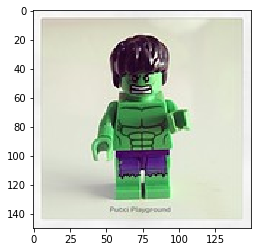

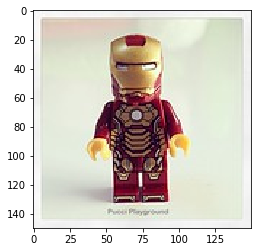

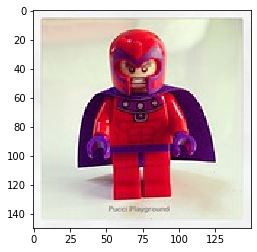

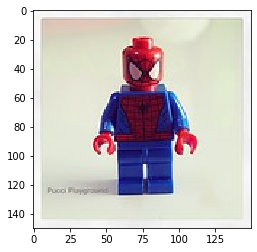

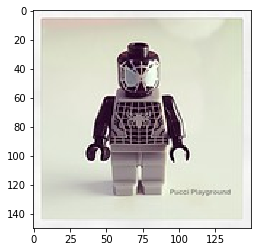

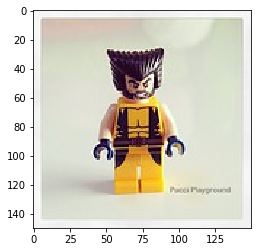

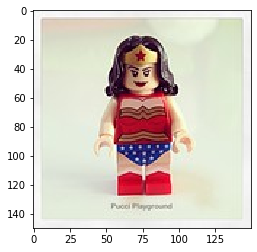

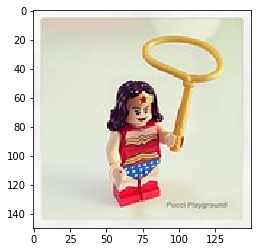

In [3]:
for k,v in images.items():
    plt.figure()
    plt.imshow(v)

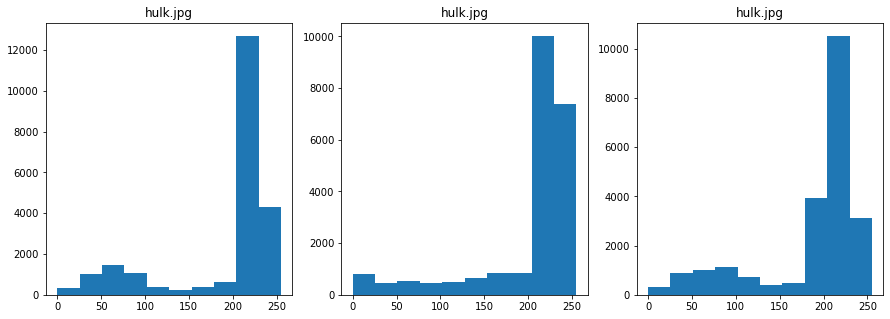

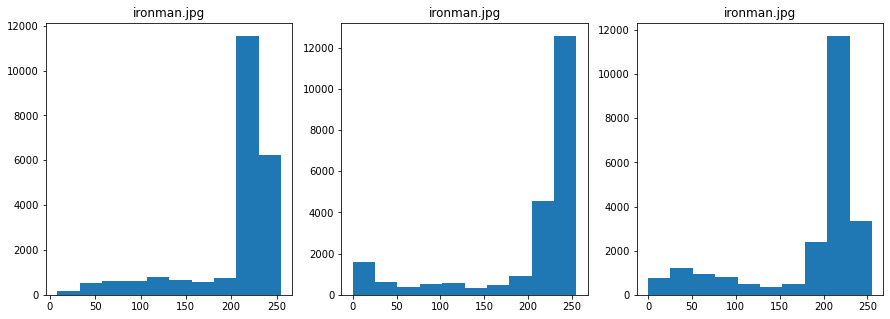

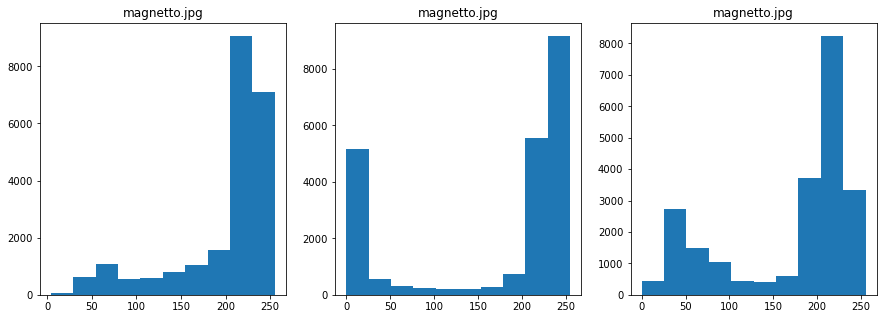

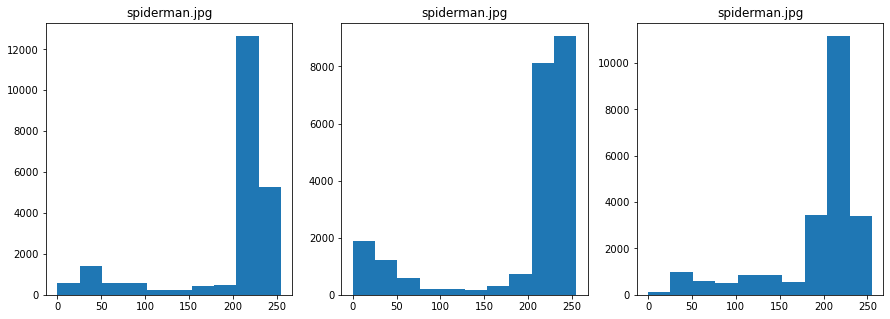

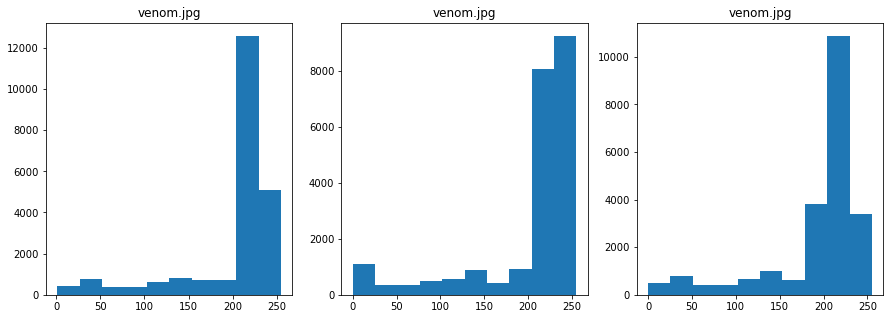

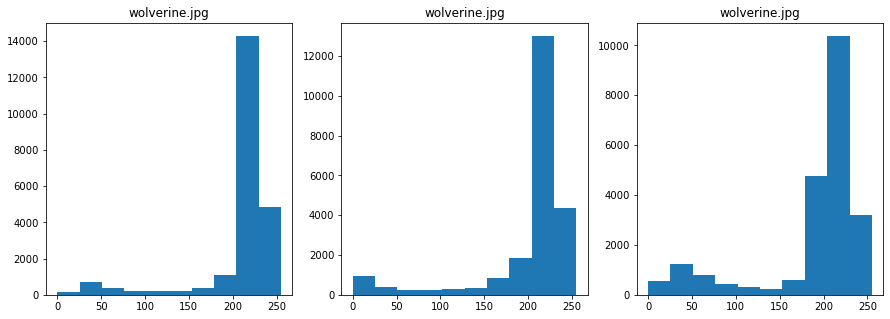

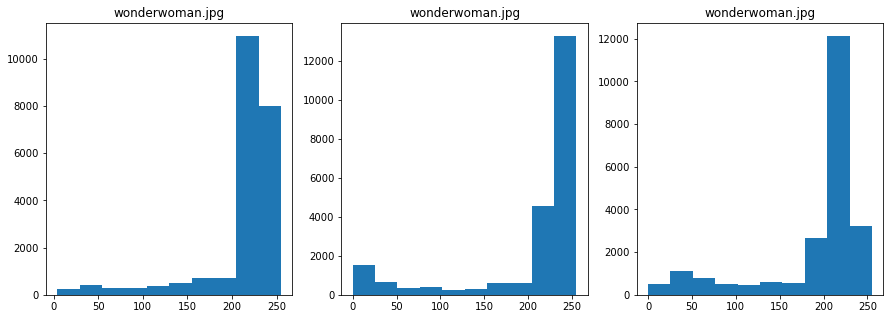

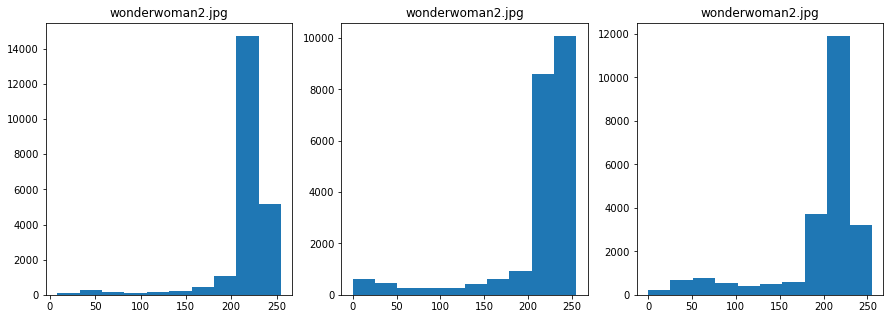

In [7]:
for k,v in images.items():
    plt.figure(figsize=(15,5))
    ax1 = plt.subplot(1,3,1)
    ax1.set_title(k)
    ax1.hist(v[:,:,0].flatten())
    ax2 = plt.subplot(1,3,2)
    ax2.set_title(k)
    ax2.hist(v[:,:,1].flatten())
    ax3 = plt.subplot(1,3,3)
    ax3.set_title(k)
    ax3.hist(v[:,:,2].flatten())    

Euc <function euclidean at 0x000002914FA2E8B8>
Taxi <function cityblock at 0x000002914FA2ED38>
Cheb <function chebyshev at 0x000002914FA2EE58>


d:\anaconda\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


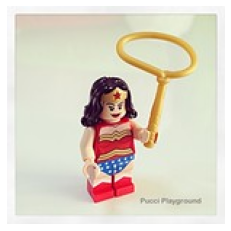

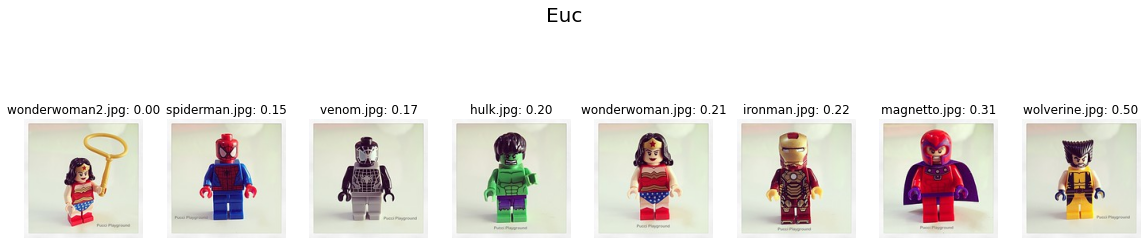

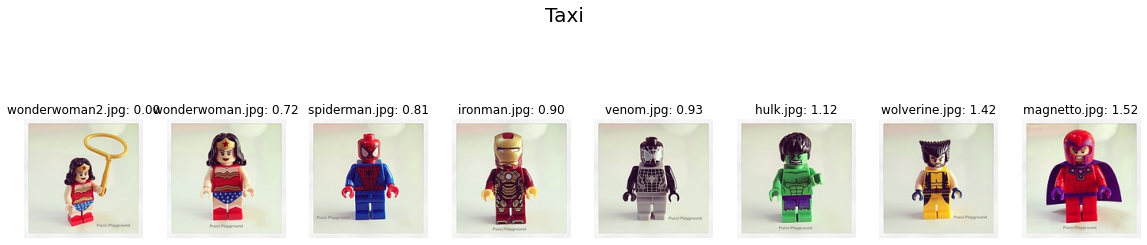

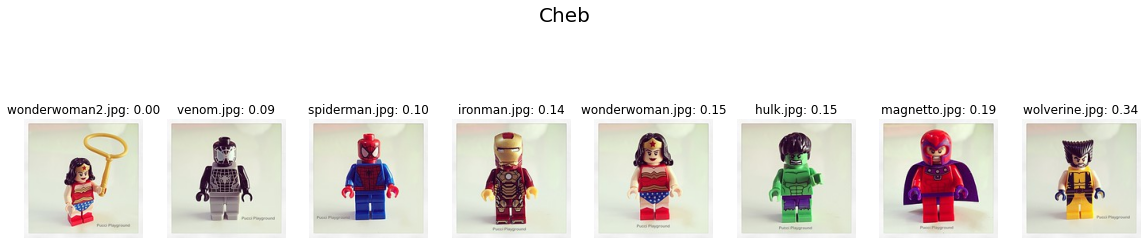

In [8]:
METRICS = (
    ("Euc",dist.euclidean),
    ("Taxi",dist.cityblock),
    ("Cheb",dist.chebyshev)
)

for name,method in METRICS:
    print(name,method)
    result = {}
    for k,hist in index.items():
        d = method(index["wonderwoman2.jpg"], hist)
        result[k] = d
    result = sorted([(v,k) for k,v in result.items()])
#     print(result)
    figure = plt.figure("Query")
    ax1 = figure.add_subplot(1,1,1)
    ax1.imshow(images["wonderwoman2.jpg"])
    plt.axis("off")
    fig = plt.figure("Results: %s" % (name), figsize=(20,5))
    fig.suptitle(name, fontsize = 20)
    for i,(v,k) in enumerate(result):
        ax = fig.add_subplot(1, len(images),i+1)
        ax.set_title("%s: %.2f" % (k,v))
        plt.imshow(images[k])
        plt.axis("off")
        

# HOMEWORK

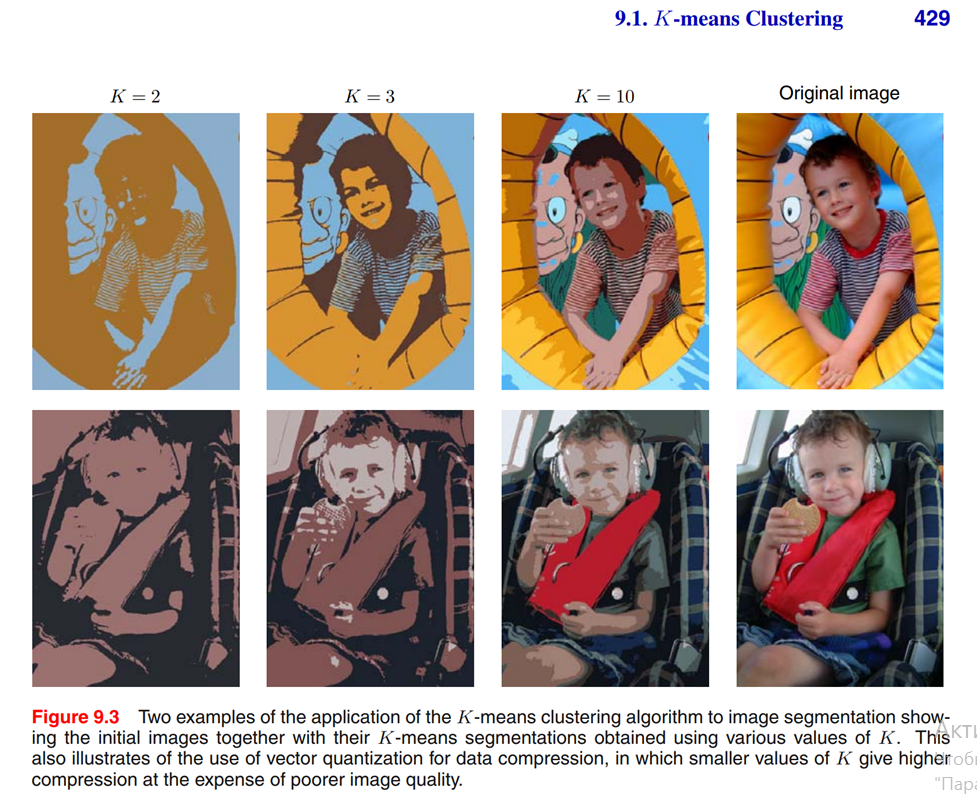

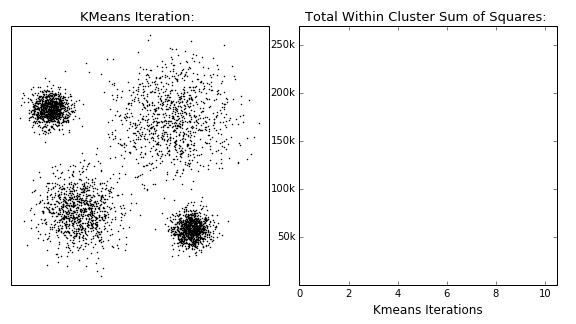

## Introduction to K-Means Clustering
* Step 1: Choose the number of clusters k. ...
* Step 2: Select k random points from the data as centroids. ...
* Step 3: Assign all the points to the closest cluster centroid. ...
* Step 4: Recompute the centroids of newly formed clusters. ...
* Step 5: Repeat steps 3 and 4.

### Task
* Read 9.1 - KMeans of Bishop book

* Develop the code of the K-means clustering algorithm for Image Segmentation. In Fig.9.3 you can see an example of the final processing result. You should use only the NumPy library. Test your implementation against k = [2,3,10]. Visualize your result. Write a conclusion about the complexity of your implementation and the quality of image compression. Don't use copy-past from the internet, cause it deserves zero marks.


In [18]:
import numpy as npy
import matplotlib.pyplot as mat

class KMeans():
    def __init__(self, k):
        self.k = k # Amount of classes
    
    def fit(self, data):
        self.data = data
        
        self.centroids = npy.random.randint(0, 256, size=(self.k, 3))
        for n in range(10):
            clindex = npy.zeros((self.data.shape[0], self.k))
            ssum = [npy.linalg.norm(self.data-self.centroids[i], axis=1) for i in range(self.k)]
            min_sums = npy.argmin(ssum, axis=0)
            for i in range(self.k):
                clindex[min_sums==i, i] = 1
              
            
            j = npy.sum([npy.sum(clindex[:,i]*npy.linalg.norm(self.data-self.centroids[i], axis=1), axis=0) for i in range(self.k)], axis=0)
            
            for i in range(self.centroids.shape[0]):
                self.centroids[i] = npy.sum(clindex[:, i][:, npy.newaxis]*self.data, axis=0) / npy.sum(clindex[:, i])
            
    
    def classify(self,x):
        minn = npy.argmin([npy.linalg.norm(self.data-self.centroids[i], axis=1) for i in range(self.k)], axis=0)
        y = npy.zeros(x.shape)
        for i in range(self.centroids.shape[0]):
            y[minn==i, :] = self.centroids[i]
        return y.astype(npy.uint8)

In [19]:
# Input data
data = [images[k].reshape((-1,3)) for k in images.keys()]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


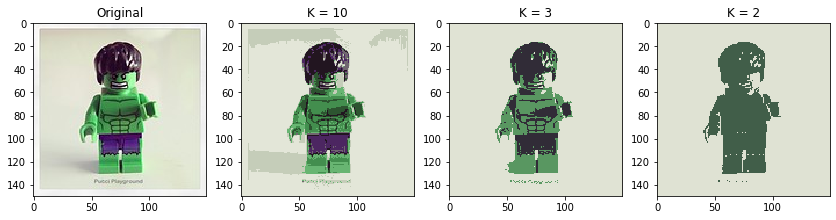

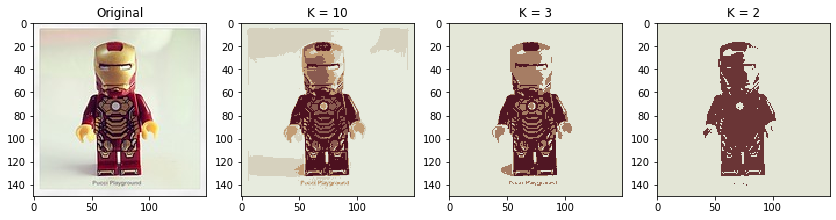

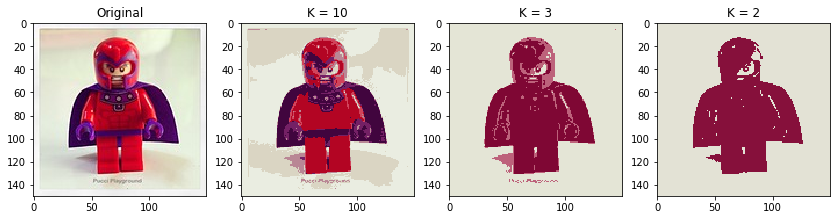

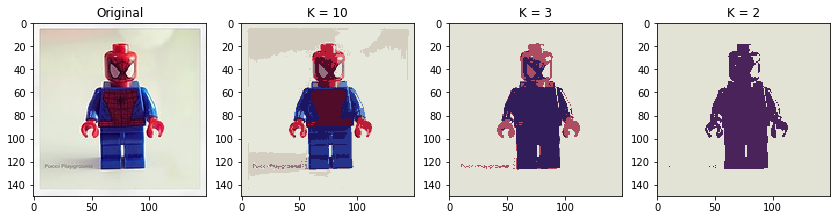

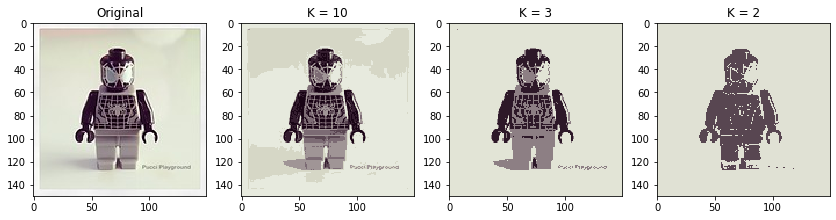

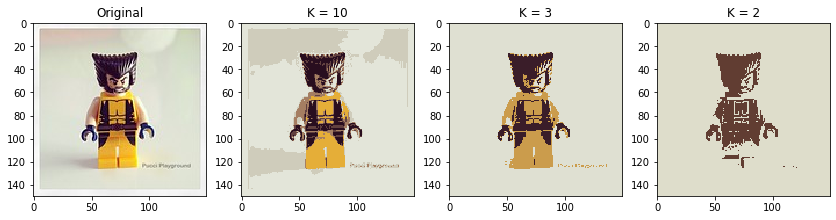

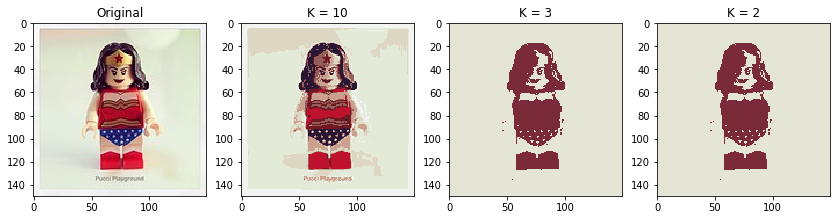

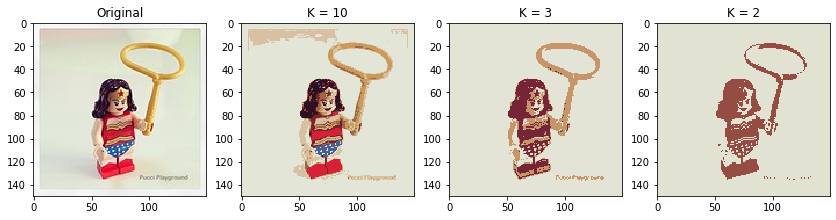

In [21]:
# Visualize the result image 
# Put your code here
kns = [10, 3, 2]
for i in range(len(images)):
    res = []
    for k in kns:
        kmeans = KMeans(k)
        kmeans.fit(data[i])
        res.append(kmeans.classify(data[i]))
        
    mat.figure(figsize=(18, 12))
    mat.subplot(1, 5, 1)
    mat.title('Original')
    mat.imshow(data[i].reshape(150, 150, 3))
    for j, k in enumerate(kns):
        mat.subplot(1, 5, j+2)
        mat.title(f'K = {k}')
        mat.imshow(res[j].reshape(150, 150, 3))
    mat.show()